In [44]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [45]:
brain_mri = nib.load('IXI662-Guys-1120-T1.nii.gz')
brain_mri_data = brain_mri.get_fdata()

In [46]:
affine = brain_mri.affine
shape = brain_mri.shape

In [47]:
print(affine)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [48]:
shape

(256, 256, 150)

In [49]:
brain_mri.header.get_zooms()

(0.9375, 0.9375, 1.2000039)

In [50]:
nib.aff2axcodes(affine)

('P', 'S', 'R')

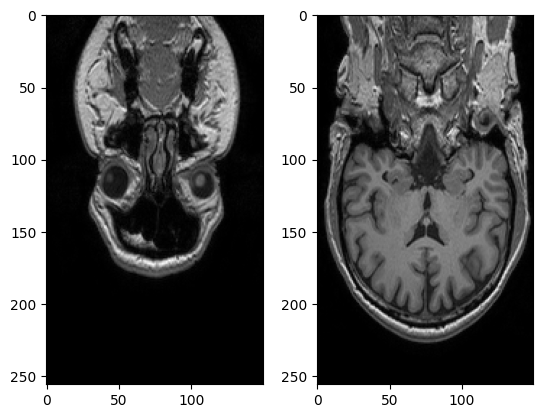

In [51]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[40, :, :], cmap='gray')
axis[1].imshow(brain_mri_data[120, :, :], cmap='gray')


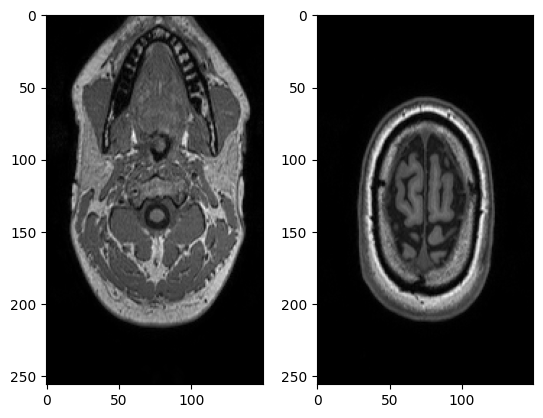

In [52]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:, 30, :], cmap='gray')
axis[1].imshow(brain_mri_data[:, 200, :], cmap='gray')


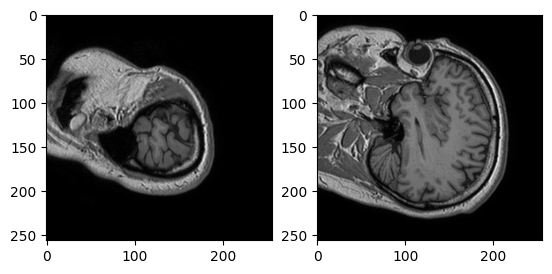

In [53]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:, :, 20], cmap='gray')
axis[1].imshow(brain_mri_data[:, :, 45], cmap='gray')


In [54]:
voxel_coords = np.array((0, 0, 0, 1))
physical_coords = affine @ voxel_coords
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [55]:
affine[:, 3:]

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

In [56]:
voxel_coords_manual = np.array((0, 0, 0))
physical_coords_manual = affine[:3, :3] @ voxel_coords_manual
physical_coords_manual += affine[:3, 3]
physical_coords_manual

array([ -90.67985535,  102.82944489, -114.82378387])

In [57]:
physical_coords = [-90.67985535, 102.82944489, -114.82378387, 1.]
(np.linalg.inv(affine) @ physical_coords).round()

array([-0.,  0., -0.,  1.])

In [58]:
##resampling

In [59]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)


In [60]:
import nibabel.processing

In [61]:
voxel_size = (2, 2, 2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128, 128, 100), voxel_size, orientation='PSR')
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [62]:
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(128, 128, 100)
(2.0, 2.0, 2.0)


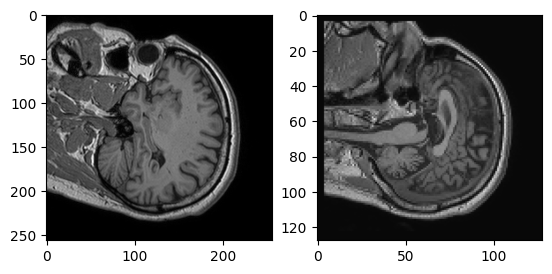

In [63]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:, :, 50], cmap='gray')
axis[1].imshow(brain_mri_resized_data[:, :, 50], cmap='gray')

In [64]:
## Normalization and standardization

In [65]:
lung_ct = nib.load('lung_043.nii.gz')
lung_ct_data = lung_ct.get_fdata()

In [66]:
lung_ct_data_standardized = lung_ct_data / 3071

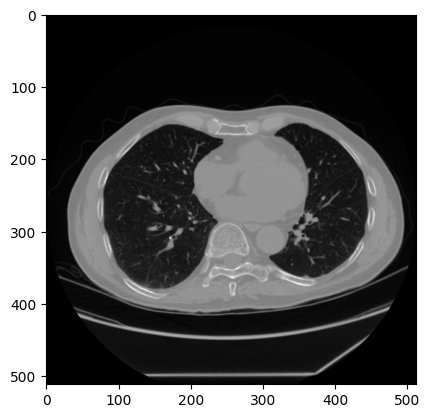

In [67]:
plt.figure()
plt.imshow(np.rot90(lung_ct_data_standardized[:, :, 50]), cmap='gray')

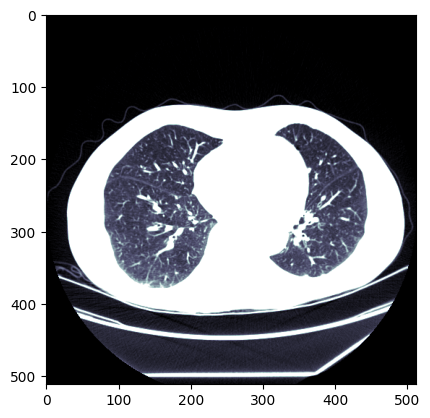

In [68]:
lung_ct_lung_window = np.clip(lung_ct_data, -1000, -500)
plt.figure()
plt.imshow(np.rot90(lung_ct_lung_window[:, :, 50]), cmap='bone')

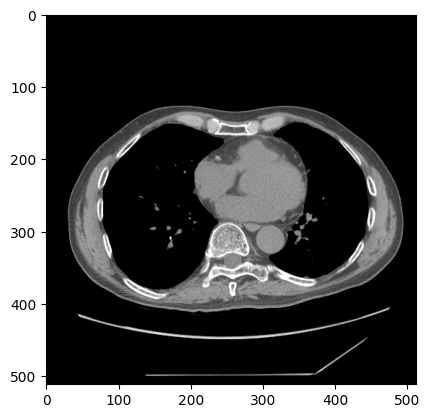

In [69]:
long_ct_soft_tissue_window = np.clip(lung_ct_data, -250, 250)
plt.figure()
plt.imshow(np.rot90(long_ct_soft_tissue_window[:, :, 50]), cmap='gray')

In [70]:
cardiac_mri = nib.load('la_003.nii.gz')
cardiac_mri_data = cardiac_mri.get_fdata()

In [71]:
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)
cardiac_mri_norm = (cardiac_mri_data - mean) / std
cardiac_mri_standardized = (cardiac_mri_norm - np.min(cardiac_mri_norm)) / (
            np.max(cardiac_mri_norm) - np.min(cardiac_mri_norm))

In [72]:
np.mean(cardiac_mri_standardized), np.mean(cardiac_mri_standardized), np.max(cardiac_mri_standardized)

(0.08641350659554545, 0.08641350659554545, 1.0)

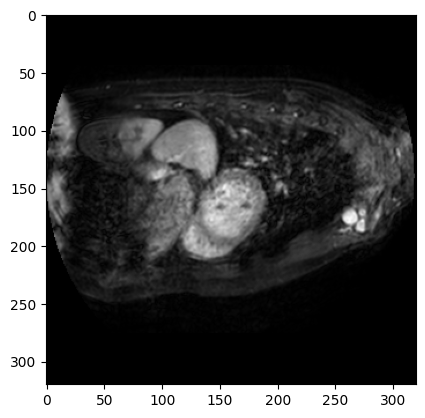

In [73]:
plt.figure()
plt.imshow(cardiac_mri_standardized[:, :, 30], cmap='gray')